In [1]:
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import json

In [2]:
# Read in the data
df = pd.read_csv("Resources/runner_result_runner_result.csv")
df = df.drop(columns="Unnamed: 0")
df

,meetingName,meetingDate,raceNumber,runnerNumber,location,weatherCondition,trackCondition,raceName,raceStartTime,raceDistance,...,track (rider wins),region (rider wins),last30Days (rider wins),last12Months (rider wins),runner (rider wins),track (rider placings),region (rider placings),last30Days (rider placings),last12Months (rider placings),runner (rider placings)
0,STONY CREEK,01/02/2022 12:00:00 AM,1,3,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,0,7,12,135,0,0,6,33,229,0
1,STONY CREEK,01/02/2022 12:00:00 AM,1,11,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,0,0,0,0,0,0,0,0,0,0
2,STONY CREEK,01/02/2022 12:00:00 AM,1,2,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,2,16,6,38,0,3,21,11,104,0
3,STONY CREEK,01/02/2022 12:00:00 AM,1,9,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,2,12,8,93,0,1,28,11,176,1
4,STONY CREEK,01/02/2022 12:00:00 AM,1,8,NaN,OCAST,GOOD3,MEENIYAN TOURISM & TRADERS ASSOCIATION,01/02/2022 01:30:00 PM,1100,...,0,8,3,56,0,7,18,1,110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,YORK,19/05/2022 12:00:00 AM,8,5,NaN,OCAST,GOOD4,HAIRITAGE HAIR BY LISA HANDICAP,19/05/2022 06:30:00 PM,1300,...,0,2,7,57,0,2,7,11,147,0
13184,YORK,19/05/2022 12:00:00 AM,8,4,NaN,OCAST,GOOD4,HAIRITAGE HAIR BY LISA HANDICAP,19/05/2022 06:30:00 PM,1300,...,0,13,1,66,0,0,11,4,132,0
13185,YORK,19/05/2022 12:00:00 AM,8,7,NaN,OCAST,GOOD4,HAIRITAGE HAIR BY LISA HANDICAP,19/05/2022 06:30:00 PM,1300,...,1,7,3,28,0,6,12,3,56,0
13186,YORK,19/05/2022 12:00:00 AM,8,6,NaN,OCAST,GOOD4,HAIRITAGE HAIR BY LISA HANDICAP,19/05/2022 06:30:00 PM,1300,...,0,13,3,47,0,4,18,9,101,0


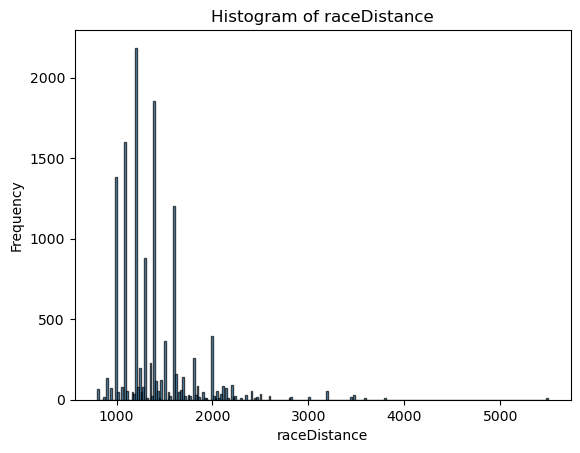

In [3]:
# Plotting the histogram using pandas
df['raceDistance'].hist(bins=250, edgecolor='black', alpha=0.7)
plt.title('Histogram of raceDistance')
plt.xlabel('raceDistance')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [4]:
# Convert categorical features to numerical
#weatherCondition = pd.get_dummies(df.weatherCondition, sparse=True)
#trackCondition = pd.get_dummies(df.trackCondition, sparse=True)
#meetingName = pd.get_dummies(df.meetingName, sparse=True)
#runnerNumber = pd.get_dummies(df.runnerNumber, sparse=True)
#raceClassConditions = pd.get_dummies(df.raceClassConditions, sparse=True)

In [5]:
import os
import json
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the 'categorical variables
df['runnerName_encoded'] = label_encoder.fit_transform(df['runnerName'])
df['raceClassConditions_encoded'] = label_encoder.fit_transform(df['raceClassConditions'])
df['runnerNumber_encoded'] = label_encoder.fit_transform(df['runnerNumber'])
df['weatherCondition_encoded'] = label_encoder.fit_transform(df['weatherCondition'])
df['trackCondition_encoded'] = label_encoder.fit_transform(df['trackCondition'])

label_encoded_columns = ['runnerName', 'weatherCondition', 'raceClassConditions', 'trackCondition', 'runnerNumber']

# Get the current working directory
current_directory = os.getcwd()

# Save the mapping files to the current directory
for col in label_encoded_columns:
    mapping = {str(key): int(value) for key, value in zip(df[col].unique(), label_encoder.fit_transform(df[col].unique()))}
    with open(os.path.join(current_directory, f'{col}_to_label_mapping.json'), 'w') as file:
        json.dump(mapping, file)



In [6]:
#import json

# Save the mapping to a JSON file
#with open('name_to_label_mapping.json', 'w') as file:
#    json.dump(name_to_label_mapping, file)

#map raceClassConditions later on if required


In [7]:
#unique_runners = X['runnerName'].nunique()
#print(f"There are {unique_runners} unique runner names in the dataset.")

#df.info()

In [8]:
# Combine the features of interest into a dataframe
X = pd.concat([df.weatherCondition_encoded,
               df.trackCondition_encoded,
               #meetingName,
               df.runnerNumber_encoded,
               df.raceClassConditions_encoded,
               df.raceDistance,
               df.finishingPosition,
               df.runnerName_encoded
              ],axis=1)

print(f"Shape of feature vector before cleaning: {X.size}")
# Drop any nans (maybe check why they are there)
X = X.dropna()
print(f"Shape of feature vector after cleaning: {X.size}")

X.columns = X.columns.astype(str)


Shape of feature vector before cleaning: 92316
Shape of feature vector after cleaning: 91154


In [9]:
#pd.set_option('display.max_columns', None)
#print(X)

In [10]:
# Scale the data
scaled_data = StandardScaler().fit_transform(X)



In [11]:
k = list(range(1, 20))
inertia = []
for i in k:
    model = KMeans(n_clusters=i, random_state=0,n_init='auto')
    model.fit(scaled_data)
    inertia.append(model.inertia_)
    
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k,"inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [12]:
elbow_plot = df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)
elbow_plot

:Curve   [k]   (inertia)

In [13]:
import seaborn as sns

In [14]:
#sns.pairplot(X)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

market_pca_data = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_

array([0.17488815, 0.16336618, 0.15048846])

In [16]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=10, random_state=0, n_init='auto')

# Fit the K-Means model using the scaled data
model.fit(scaled_data)

# Predict the clusters to group the horses using the scaled data
horse_clusters = model.predict(scaled_data)

# View the resulting array of cluster values.
print(horse_clusters)

# Create a copy of the DataFrame
scaled_predictions = X.copy()

# Add a new column to the DataFrame with the predicted clusters
scaled_predictions["horse_clusters"] = horse_clusters

# Display sample data
scaled_predictions

[2 6 2 ... 1 1 1]


,weatherCondition_encoded,trackCondition_encoded,runnerNumber_encoded,raceClassConditions_encoded,raceDistance,finishingPosition,runnerName_encoded,horse_clusters
0,1,3,2,37,1100,4.0,2876,2
1,1,3,10,37,1100,-2.0,7051,6
2,1,3,1,37,1100,0.0,1198,2
3,1,3,8,37,1100,-2.0,5173,1
4,1,3,7,37,1100,1.0,4381,2
...,...,...,...,...,...,...,...,...
13183,1,4,4,103,1300,2.0,2555,1
13184,1,4,3,103,1300,4.0,6203,0
13185,1,4,6,103,1300,0.0,6035,1
13186,1,4,5,103,1300,1.0,2886,1


In [17]:
clusters_plot = scaled_predictions.hvplot.scatter(
    x="runnerName_encoded",
    y="raceDistance",
    by="horse_clusters",
)
clusters_plot

:NdOverlay   [horse_clusters]
   :Scatter   [runnerName_encoded]   (raceDistance)

In [18]:
# Convert finishingPosition to binary: 1 if the horse placed (1-4), 0 otherwise
X['finishingPosition'] = X['finishingPosition'].apply(lambda x: 1 if 1.0 <= x <= 3.0 else 0)


In [19]:
X

,weatherCondition_encoded,trackCondition_encoded,runnerNumber_encoded,raceClassConditions_encoded,raceDistance,finishingPosition,runnerName_encoded
0,1,3,2,37,1100,0,2876
1,1,3,10,37,1100,0,7051
2,1,3,1,37,1100,0,1198
3,1,3,8,37,1100,0,5173
4,1,3,7,37,1100,1,4381
...,...,...,...,...,...,...,...
13183,1,4,4,103,1300,1,2555
13184,1,4,3,103,1300,0,6203
13185,1,4,6,103,1300,0,6035
13186,1,4,5,103,1300,1,2886


In [20]:
from sklearn.model_selection import train_test_split

# Features and target variable
y = X['finishingPosition']
X_features = X.drop('finishingPosition', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=1)

In [21]:
#X_features = X.drop('finishingPosition', axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=1)

In [22]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))  # Hidden layer
model.add(Dense(8, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_test, y_test)
)


Epoch 1/20
138/652 [=====>........................] - ETA: 0s - loss: 11.0272 - accuracy: 0.6576   

2023-10-17 19:58:03.754274: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


652/652 [==============================] - 0s 458us/step - loss: 4.0723 - accuracy: 0.6687 - val_loss: 2.0774 - val_accuracy: 0.7846
Epoch 2/20
652/652 [==============================] - 0s 354us/step - loss: 1.1696 - accuracy: 0.6973 - val_loss: 0.5708 - val_accuracy: 0.7512
Epoch 3/20
652/652 [==============================] - 0s 342us/step - loss: 0.9902 - accuracy: 0.7099 - val_loss: 0.7561 - val_accuracy: 0.7566
Epoch 4/20
652/652 [==============================] - 0s 354us/step - loss: 0.9309 - accuracy: 0.7094 - val_loss: 1.6433 - val_accuracy: 0.7846
Epoch 5/20
652/652 [==============================] - 0s 349us/step - loss: 1.0552 - accuracy: 0.7037 - val_loss: 2.7490 - val_accuracy: 0.3094
Epoch 6/20
652/652 [==============================] - 0s 353us/step - loss: 0.9983 - accuracy: 0.7145 - val_loss: 0.7854 - val_accuracy: 0.7846
Epoch 7/20
652/652 [==============================] - 0s 346us/step - loss: 0.8398 - accuracy: 0.7282 - val_loss: 1.1327 - val_accuracy: 0.7846
Epo

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


82/82 [==============================] - 0s 270us/step - loss: 0.5243 - accuracy: 0.7846
Test Loss: 0.5243
Test Accuracy: 0.7846


In [26]:
model.save("horsey_model_for_aws_v1.h5")

In [27]:
y_pred_probs = model.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]


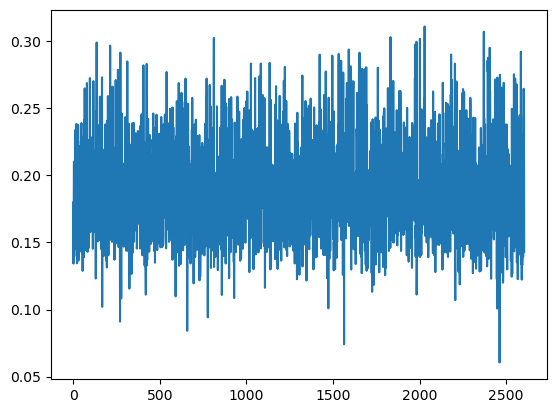

In [28]:
plt.plot(y_pred_probs)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


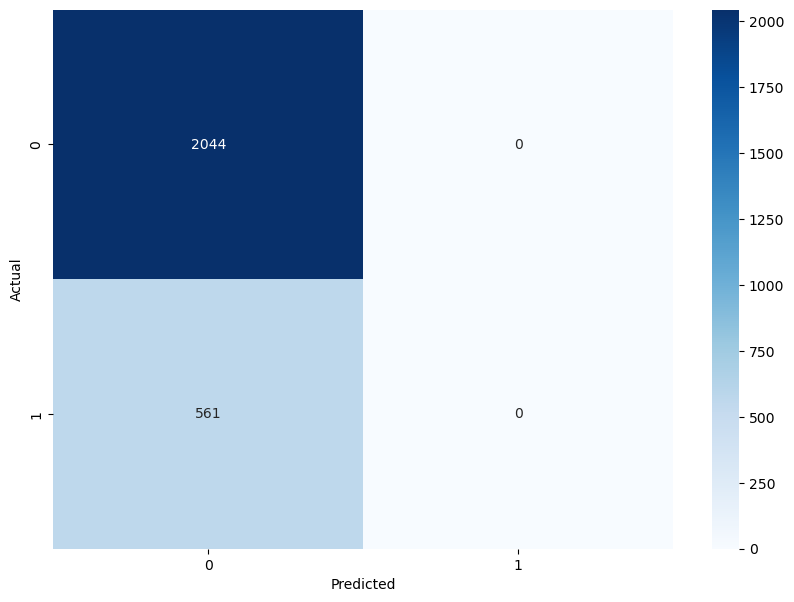

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:
### RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

In [34]:
rf_model = rf_model.fit(X_train, y_train)

In [35]:
y_pred = rf_model.predict(X_test)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7600767754318618

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.96      0.86      2044
         1.0       0.19      0.04      0.06       561

    accuracy                           0.76      2605
   macro avg       0.49      0.50      0.46      2605
weighted avg       0.66      0.76      0.69      2605


Confusion Matrix:
 [[1960   84]
 [ 541   20]]


In [37]:
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': importances
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                       Feature  Importance
5           runnerName_encoded    0.360459
3  raceClassConditions_encoded    0.182781
2         runnerNumber_encoded    0.175950
4                 raceDistance    0.153772
1       trackCondition_encoded    0.084942
0     weatherCondition_encoded    0.042097


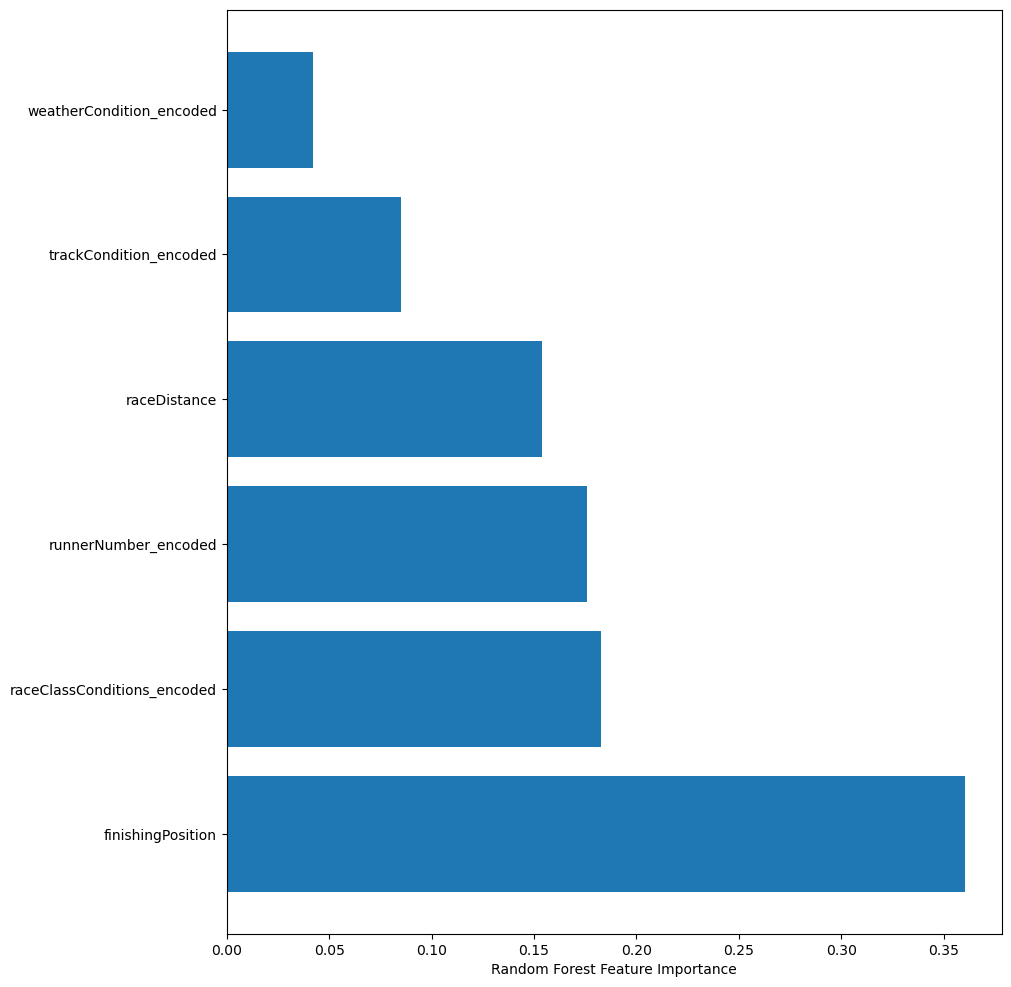

In [38]:
import matplotlib.pyplot as plt

# Sort feature importances in descending order and plot
sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(10, 12))
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()


In [39]:
print(feature_importance[0:30])

                       Feature  Importance
5           runnerName_encoded    0.360459
3  raceClassConditions_encoded    0.182781
2         runnerNumber_encoded    0.175950
4                 raceDistance    0.153772
1       trackCondition_encoded    0.084942
0     weatherCondition_encoded    0.042097


In [40]:
feature_importance['Feature'][:20].to_list()

['runnerName_encoded',
 'raceClassConditions_encoded',
 'runnerNumber_encoded',
 'raceDistance',
 'trackCondition_encoded',
 'weatherCondition_encoded']

In [41]:
#X = X[feature_importance['Feature'][:20].to_list()]

In [42]:
unique_values = {column: X[column].unique().tolist() for column in X.columns}


In [43]:
X

,weatherCondition_encoded,trackCondition_encoded,runnerNumber_encoded,raceClassConditions_encoded,raceDistance,finishingPosition,runnerName_encoded
0,1,3,2,37,1100,0,2876
1,1,3,10,37,1100,0,7051
2,1,3,1,37,1100,0,1198
3,1,3,8,37,1100,0,5173
4,1,3,7,37,1100,1,4381
...,...,...,...,...,...,...,...
13183,1,4,4,103,1300,1,2555
13184,1,4,3,103,1300,0,6203
13185,1,4,6,103,1300,0,6035
13186,1,4,5,103,1300,1,2886


In [44]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import json
from keras.models import load_model
import time

def run_prediction():
    # Load your model
    model = load_model("horsey_model_for_aws_v1.h5")
    # Create a dummy prediction input based on your actual model's input structure
    # For this example, I'm assuming it's a single array with the encoded values
    prediction_input = [
        input_data['runnerName_encoded'],
        input_data['weatherCondition_encoded'],
        input_data['trackCondition_encoded'],
        input_data['raceClassConditions_encoded'],
        input_data['runnerNumber_encoded'],
        int(input_data['raceDistance'])
    ]
    # Predict
    prediction = model.predict([prediction_input])
    # Clear the window and display the result
    for widget in root.winfo_children():
        widget.destroy()
    if prediction == 1:
        ttk.Label(root, text="WE HAVE A WINNER").grid(column=1, row=1)
    else:
        ttk.Label(root, text="SORRY, YOU ARE A LOSER").grid(column=1, row=1)
    ttk.Button(root, text="Go back", command=show_selection_interface).grid(column=1, row=2)


def countdown():
    for widget in root.winfo_children():
        widget.destroy()
    for i in range(3, 0, -1):
        ttk.Label(root, text=f"Fantastic... running prediction model in {i}...").grid(column=1, row=1)
        root.update()
        time.sleep(1.5)
    run_prediction()

def summary_screen():
    for widget in root.winfo_children():
        widget.destroy()
    ttk.Label(root, text="Congratulations, you have selected:").grid(column=1, row=0)
    for index, (key, value) in enumerate(input_data.items()):
        if key in label_encoded_columns:  # Use the original key name for display (without '_encoded')
            key_display = key.replace('_encoded', '')
            ttk.Label(root, text=f"{key_display}: {inverse_mappings[key][value]}").grid(column=1, row=index + 1)
        else:
            ttk.Label(root, text=f"{key}: {value}").grid(column=1, row=index + 1)
    row_for_text = len(input_data) + 2
    ttk.Label(root, text="").grid(column=1, row=row_for_text)  # Empty line
    ttk.Label(root, text="Are you ready to predict if this horse will place?").grid(column=1, row=row_for_text + 1, columnspan=2)
    ttk.Button(root, text="YES", command=countdown).grid(column=1, row=row_for_text + 2)
    ttk.Button(root, text="NO", command=show_selection_interface).grid(column=2, row=row_for_text + 2)



def confirm_selection():
    for widget in root.winfo_children():
        widget.destroy()
    ttk.Label(root, text="Congratulations, you have selected:").grid(column=1, row=0)
    for index, (key, value) in enumerate(input_data.items()):
        if key in label_encoded_columns:  # Use the original key name for display (without '_encoded')
            key_display = key.replace('_encoded', '')
            ttk.Label(root, text=f"{key_display}: {inverse_mappings[key][value]}").grid(column=1, row=index + 1)
        else:
            ttk.Label(root, text=f"{key}: {value}").grid(column=1, row=index + 1)
    row_for_text = len(input_data) + 2
    ttk.Label(root, text="").grid(column=1, row=row_for_text)  # Empty line
    ttk.Label(root, text="Are you ready to predict if this horse will place?").grid(column=1, row=row_for_text + 1, columnspan=2)
    ttk.Button(root, text="YES", command=countdown).grid(column=1, row=row_for_text + 2)
    ttk.Button(root, text="NO", command=show_selection_interface).grid(column=2, row=row_for_text + 2)


def get_input_values():
    global input_data
    input_data = {}
    for column, dropdown in dropdowns.items():
        selected_value = dropdown.get()
        if column in label_encoded_columns:
            mapping_file = f"{column}_to_label_mapping.json"
            with open(mapping_file, 'r') as file:
                mapping = json.load(file)
            input_data[column + '_encoded'] = mapping[selected_value]
        else:
            input_data[column] = selected_value  # Ensure we're storing non-encoded values directly

def submit_button_clicked():
    get_input_values()
    summary_screen()

def show_selection_interface():
    for widget in root.winfo_children():
        widget.destroy()
    for index, (column, values) in enumerate(columns.items()):
        ttk.Label(root, text=f"{column}:").grid(column=1, row=index + 1, sticky=tk.W)
        dropdown_var = tk.StringVar()
        dropdown = ttk.Combobox(root, textvariable=dropdown_var)
        dropdown['values'] = values
        dropdown.grid(column=2, row=index + 1)
        dropdowns[column] = dropdown_var

    # Submit button
    ttk.Button(root, text="Submit", command=submit_button_clicked).grid(column=1, row=len(columns) + 2, columnspan=2)

columns = {
    'runnerName': sorted(df['runnerName'].dropna().unique().tolist()),
    'weatherCondition': sorted(df['weatherCondition'].dropna().unique().tolist()),
    'raceClassConditions': sorted(df['raceClassConditions'].dropna().unique().tolist()),
    'trackCondition': sorted(df['trackCondition'].dropna().unique().tolist()),
    'runnerNumber': sorted(df['runnerNumber'].dropna().unique(), key=int),  # assuming runnerNumber is an integer
    'raceDistance': sorted(df['raceDistance'].dropna().unique(), key=int)  # assuming raceDistance is an integer
}


# Load your dataframe, define columns, dropdowns and inverse mappings
# Here, I'm assuming you've already loaded 'df' and other required variables
inverse_mappings = {col: {v: k for k, v in json.load(open(f"{col}_to_label_mapping.json")).items()} for col in label_encoded_columns}

# Define the GUI components
root = tk.Tk()
root.geometry("400x400")  
root.title("Model Input GUI")
dropdowns = {}
show_selection_interface()
root.mainloop()


In [45]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /Users/darcy5d/Desktop/fintech_bootcamp/project_02_clean/bookie-on-bookies
